In [27]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [28]:
def import_data():
    df = pd.read_table("HotelCustomersDataset.tsv").set_index("ID")
    df=df.drop(columns=['NameHash', 'DocIDHash'])
    return df
df=import_data()

This notebook is about Booking Preference Classifcation. We want to identify customers likely to specify bed preference based on booking behavior.

In [29]:
def fillna(df):
    return df.fillna(df.mean())
df=fillna(df)

In [30]:
def get_dummies(df):
    return pd.get_dummies(df)
df=get_dummies(df)

In [31]:
SRCols = []
XCols = []
for c in df.columns:
        if 'SR' in c[0:2]:
            SRCols.append(c)
        else:
            XCols.append(c)

# Random Forest: King Size Bed

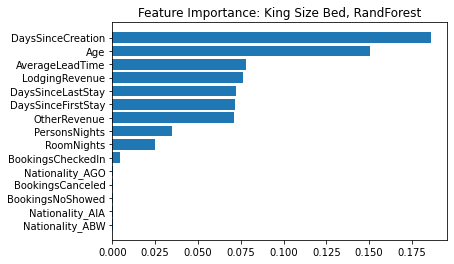

Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [32]:
X=np.asarray(df[XCols])
y=np.asarray(df['SRKingSizeBed'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=RandomForestClassifier()
#

m = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

feature_importance = clf.feature_importances_[0:15]
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df[XCols].columns)[sorted_idx])
plt.title('Feature Importance: King Size Bed, RandForest')
plt.show()
    
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10,15,20,30,40,50,60],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
m = grid_search.fit(X_train, y_train)

In [33]:
print("Training Error: " + str(m.score(X_train, y_train)))
print("Test Error: " + str(m.score(X_test, y_test)))

Training Error: 0.994138054791243
Test Error: 0.7365713602105515


# Random Forest: Twin Bed

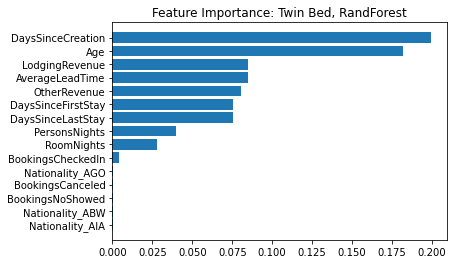

1905
Fitting 2 folds for each of 9 candidates, totalling 18 fits


In [34]:
#Logistic Regression
#Select one lodging preference to predict

X=np.asarray(df[XCols])
y=np.asarray(df['SRTwinBed'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=RandomForestClassifier()
#

m = clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

feature_importance = clf.feature_importances_[0:15]
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df[XCols].columns)[sorted_idx])
plt.title('Feature Importance: Twin Bed, RandForest')
plt.show()
print(sum([abs(y_pred[i] - y_test[i]) for i in range(len(y_pred))]))
    
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [1,5,10,15,20,30,40,50,60],
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
# Fit the grid search to the data
m = grid_search.fit(X_train, y_train)

In [35]:
print("Training Error: " + str(m.score(X_train, y_train)))
print("Test Error: " + str(m.score(X_test, y_test)))

Training Error: 0.9243480081349443
Test Error: 0.8855724368943654


# Logistic Regression: King Size Bed

C:\Users\pptma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


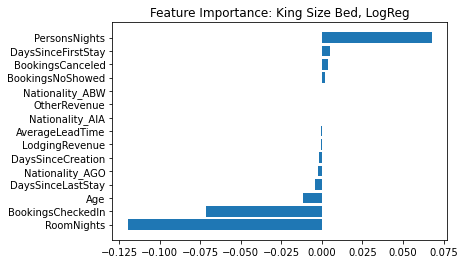

Fitting 2 folds for each of 14 candidates, totalling 28 fits


C:\Users\pptma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
14 fits failed out of a total of 28.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pptma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pptma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pptma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [36]:
X=np.asarray(df[XCols])
y=np.asarray(df['SRKingSizeBed'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=LogisticRegression()

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

feature_importance = clf.coef_[0][0:15]
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df[XCols].columns)[sorted_idx])
plt.title('Feature Importance: King Size Bed, LogReg')
plt.show()
    
# Create the parameter grid based on the results of random search 
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
m = grid_search.fit(X_train, y_train)

In [37]:
print("Training Error: " + str(m.score(X_train, y_train)))
print("Test Error: " + str(m.score(X_test, y_test)))

Training Error: 0.6391613829405431
Test Error: 0.6393109223591339


# Logistic Regression: Twin Bed

C:\Users\pptma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


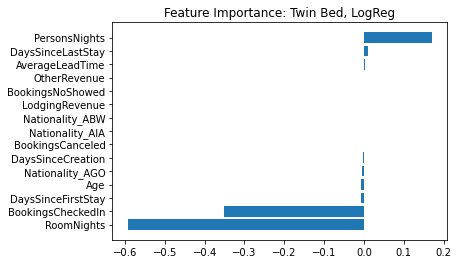

Fitting 2 folds for each of 14 candidates, totalling 28 fits


C:\Users\pptma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
14 fits failed out of a total of 28.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
14 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\pptma\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\pptma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\pptma\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

In [38]:
X=np.asarray(df[XCols])
y=np.asarray(df['SRTwinBed'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf=LogisticRegression()

clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

feature_importance = clf.coef_[0][0:15]
sorted_idx = np.argsort(feature_importance)
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(df[XCols].columns)[sorted_idx])
plt.title('Feature Importance: Twin Bed, LogReg')
plt.show()
    
# Create the parameter grid based on the results of random search 
param_grid = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
logreg = LogisticRegression()
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 2, n_jobs = -1, verbose = 2)
m = grid_search.fit(X_train, y_train)

In [39]:
print("Training Error: " + str(m.score(X_train, y_train)))
print("Test Error: " + str(m.score(X_test, y_test)))

Training Error: 0.8563374805598756
Test Error: 0.8589544203852135
